# Multivariate Linear Regression from scratch with gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
w, b = generate_w_b(5, w_limit=5, b_limit=15)
X_train, y_train = generate_X_y((100, 5), w, b, x_limit=10, random_err=30)
X_train.shape, y_train.shape

((100, 5), (100,))

In [3]:
w_init = np.zeros_like(w)
b_init = 0.0

iterations = 1000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

print(f"Actual b: {b:0.2f},\tPredicted b: {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

Iteration    0: Cost   340.18
Iteration  100: Cost   152.83
Iteration  200: Cost   147.99
Iteration  300: Cost   147.31
Iteration  400: Cost   147.21
Iteration  500: Cost   147.20
Iteration  600: Cost   147.20
Iteration  700: Cost   147.20
Iteration  800: Cost   147.20
Iteration  900: Cost   147.20
Actual b: 9.02,	Predicted b: 9.21
Actual w[0]: 3.65,	Predicted w[0]: 2.88
Actual w[1]: -1.09,	Predicted w[1]: -0.66
Actual w[2]: 3.01,	Predicted w[2]: 2.31
Actual w[3]: -0.65,	Predicted w[3]: -0.86
Actual w[4]: 2.40,	Predicted w[4]: 2.63


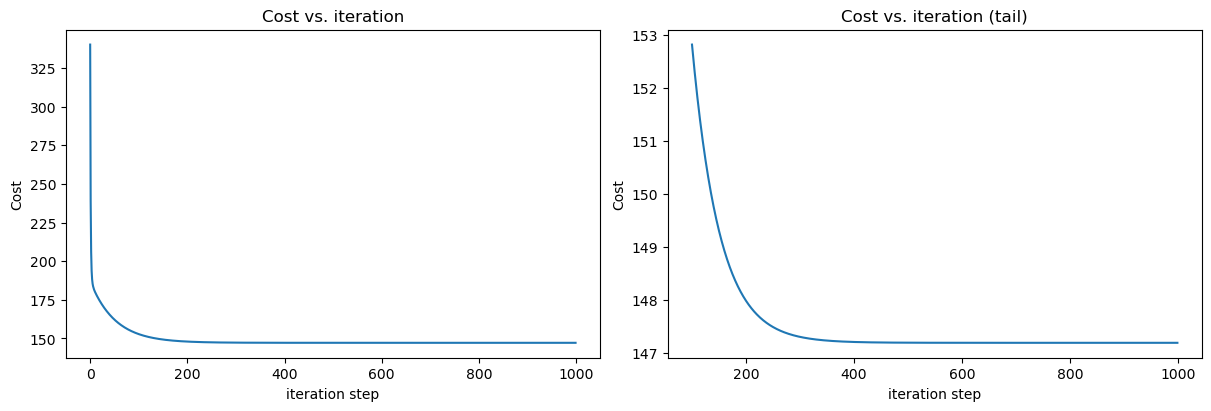

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])

ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [5]:
print(f"Actual b: {b:0.2f},\tPredicted b: {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = np.dot(X_train, w_final) + b_final
mse_ = mse(y_train, y_pred)
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mae(y_train, y_pred)
print(f"Mean absolute error: {mae_:0.2f}")

Actual b: 9.02,	Predicted b: 9.21
Actual w[0]: 3.65,	Predicted w[0]: 2.88
Actual w[1]: -1.09,	Predicted w[1]: -0.66
Actual w[2]: 3.01,	Predicted w[2]: 2.31
Actual w[3]: -0.65,	Predicted w[3]: -0.86
Actual w[4]: 2.40,	Predicted w[4]: 2.63
Mean squared error: 294.40
Mean absolute error: 14.07


# Multivariate Linear Regression from scratch with ordinary least squares method

In [6]:
class MultipleLinearRegression:

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.array(X)
        result = np.zeros(len(X))
        for i in range(X.shape[1]):
            result += X[:, i] * self.coeffs[i]
        return result
    
    def coeffs(self):
        return self.coeffs

In [7]:
linear_model = MultipleLinearRegression()
linear_model.fit(X_train, y_train)
w_final = linear_model.coeffs
b_final = 0.0
for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = linear_model.predict(X_train)
mse_ = mse(y_train, y_pred)
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mae(y_train, y_pred)
print(f"Mean absolute error: {mae_:0.2f}")

Actual w[0]: 3.65,	Predicted w[0]: 2.96
Actual w[1]: -1.09,	Predicted w[1]: -0.86
Actual w[2]: 3.01,	Predicted w[2]: 2.45
Actual w[3]: -0.65,	Predicted w[3]: -0.76
Actual w[4]: 2.40,	Predicted w[4]: 2.66
Mean squared error: 377.22
Mean absolute error: 16.19


# Multivariate Linear Regression with Sklearn

In [8]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_

print(f"Actual b: {b:0.2f},\tPredicted b: {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = linear_model.predict(X_train)
mse_ = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mean_absolute_error(y_train, y_pred)
print(f"Mean absolute error: {mae_:0.2f}")

Actual b: 9.02,	Predicted b: 9.21
Actual w[0]: 3.65,	Predicted w[0]: 2.88
Actual w[1]: -1.09,	Predicted w[1]: -0.66
Actual w[2]: 3.01,	Predicted w[2]: 2.31
Actual w[3]: -0.65,	Predicted w[3]: -0.86
Actual w[4]: 2.40,	Predicted w[4]: 2.63
Mean squared error: 294.40
Mean absolute error: 14.07


In [10]:
linear_model = SGDRegressor()
linear_model.fit(X_train, y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_[0]

print(f"Actual b: {b:0.2f},\tPredicted b:_ {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = linear_model.predict(X_train)
mse_ = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mean_absolute_error(y_train, y_pred)
print(f"Mean absolute error: {mae_:0.2f}")

Actual b: 9.02,	Predicted b:_ 9.16
Actual w[0]: 3.65,	Predicted w[0]: 2.87
Actual w[1]: -1.09,	Predicted w[1]: -0.76
Actual w[2]: 3.01,	Predicted w[2]: 2.93
Actual w[3]: -0.65,	Predicted w[3]: -0.58
Actual w[4]: 2.40,	Predicted w[4]: 3.11
Mean squared error: 314.50
Mean absolute error: 14.68
